Downloaded omniglot dataset (v:1.0.0)
Size in disk: 18.827037 MB
659


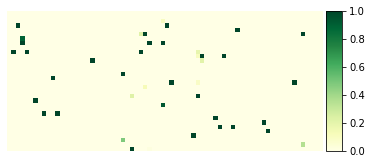

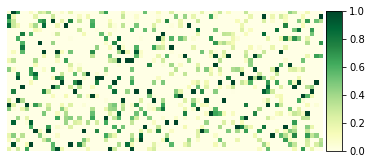

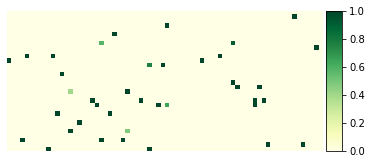

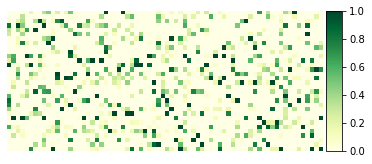

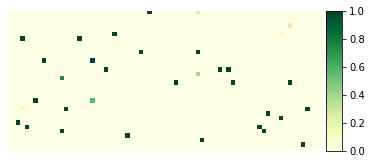

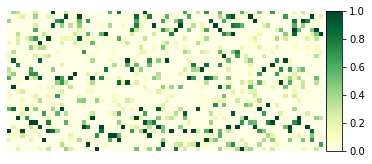

In [3]:
import tensorflow as tf
import numpy as np
from experiments.exp4_2.omniglot_model import get_background_data_by_classes, mrcl_omniglot
from datasets.tf_datasets import load_omniglot
from util.plotter import visualize

background_data, evaluation_data = load_omniglot(verbose=1)
background_training_data, _, _ = get_background_data_by_classes(background_data)
evaluation_training_data, _, _ = get_background_data_by_classes(evaluation_data)
rln_mrcl_saved = tf.keras.models.load_model("saved_models_300_nodes/rln_pretraining_mrcl_1900_omniglot.tf")
#rln_mrcl_saved = tf.keras.models.load_model("saved_models/rln_pretraining_mrcl_14984_omniglot.tf")
rln_pt_saved = tf.keras.models.load_model("saved_models/rln_basic_pretraining_999_0.001_omniglot.tf")
print(len(evaluation_training_data))

rln, _ = mrcl_omniglot(classes=len(background_training_data))

for _ in range(3):
    random_class = np.random.choice(range(len(background_training_data)))
    random_sample = np.random.choice(len(background_training_data[random_class]))
    x = background_training_data[random_class][random_sample]['image']
    y = background_training_data[random_class][random_sample]['label']
    x = np.expand_dims(x, axis=0)
    rln.set_weights(rln_mrcl_saved.get_weights())
    representation = rln(x)
    visualize(representation.numpy(), save_name=f"representation_sparsity_mrcl_{random_class}_{random_sample}.pdf")
    
    rln.set_weights(rln_pt_saved.get_weights())
    representation = rln(x)
    visualize(representation.numpy(), save_name=f"representation_sparsity_pretraining_{random_class}_{random_sample}.pdf")  

In [4]:
x = []
for item in background_training_data:
    for i in range(len(item)):
        x.append(item[i]['image'])
for item in evaluation_training_data:
    for i in range(len(item)):
        x.append(item[i]['image'])
x = np.array(x)

In [5]:
rln.set_weights(rln_mrcl_saved.get_weights())
representations = None
for batch_x in tf.data.Dataset.from_tensor_slices((x)).batch(128):
    representation = rln(batch_x)
    if representations is None:
        representations = representation
    else:
        representations = np.vstack((representations, representation))

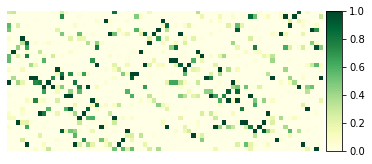

0.5889756944444444


In [13]:
mean_representation = np.sum(representations, axis=0)
visualize(mean_representation, save_name=f"mrcl_average_representation.pdf")
counts = np.isclose(mean_representation, 0).sum(axis=0) / mean_representation.shape[0]
print(counts)

In [ ]:
x = []
for item in background_training_data:
    for i in range(len(item)):
        x.append(item[i]['image'])
x = np.array(x)
rln.set_weights(rln_mrcl_saved.get_weights())
representations = None
for batch_x in tf.data.Dataset.from_tensor_slices((x)).batch(128):
    representation = rln(batch_x)
    if representations is None:
        representations = representation
    else:
        representations = np.vstack((representations, representation))

In [ ]:
counts = np.isclose(mean_representation, 0).sum(axis=0) / mean_representation.shape[0]
print(counts)